In [5]:
# Q.1 Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and
#interpret the results

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')



def z_test(sample, population_mean, population_std):
    sample_mean = np.mean(sample)
    sample_size = len(sample)
    z = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    return z, p_value

# Example usage
sample_data = np.random.normal(100, 15, 30)  # Simulated data
population_mean = 105
population_std = 15
z_stat, p_val = z_test(sample_data, population_mean, population_std)
print(f"Z-statistic: {z_stat}, P-value: {p_val}")


Z-statistic: -1.4399444640634314, P-value: 0.14988311192024106


In [6]:
# q,2  Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python
np.random.seed(42)
simulated_sample = np.random.normal(50, 10, 50)  # mean=50, std=10, n=50
population_mean = 55
population_std = 10

z_stat, p_val = z_test(simulated_sample, population_mean, population_std)
print(f"Simulated Z-statistic: {z_stat}, P-value: {p_val}")


Simulated Z-statistic: -5.129875179805039, P-value: 2.8993436451685284e-07


In [7]:
#q.3  Implement a one-sample Z-test using Python to compare the sample mean with the population mean
# Already answered in the first implementation above.
# Use `z_test()` function for one-sample Z-test.

In [9]:
#Q.4  Perform a two-tailed Z-test using Python and visualize the decision region on a plot



def visualize_z_test(sample, population_mean, population_std):
    z, p_value = z_test(sample, population_mean, population_std)
    critical_value = stats.norm.ppf(0.975)  # 95% confidence

    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x)

    plt.plot(x, y, label="Normal Distribution")
    plt.fill_between(x, y, where=(x < -critical_value) | (x > critical_value), color="red", alpha=0.5, label="Rejection Region")
    plt.axvline(z, color="blue", linestyle="--", label=f"Z = {z:.2f}")
    plt.title("Two-tailed Z-test Visualization")
    plt.legend()
    plt.show()

In [10]:
#q.5Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing

def type_errors(mu, mu_alt, sigma, n, alpha=0.05):
    z_critical = stats.norm.ppf(1 - alpha)
    beta = stats.norm.cdf(z_critical - (mu_alt - mu) / (sigma / np.sqrt(n)))
    power = 1 - beta

    x = np.linspace(mu - 3 * sigma, mu_alt + 3 * sigma, 1000)
    y_null = stats.norm.pdf(x, mu, sigma / np.sqrt(n))
    y_alt = stats.norm.pdf(x, mu_alt, sigma / np.sqrt(n))

    plt.plot(x, y_null, label="Null Hypothesis (H0)")
    plt.plot(x, y_alt, label="Alternative Hypothesis (H1)", linestyle="--")
    plt.axvline(mu + z_critical * sigma / np.sqrt(n), color="red", linestyle="--", label="Critical Value")
    plt.fill_between(x, y_null, where=(x >= mu + z_critical * sigma / np.sqrt(n)), color="blue", alpha=0.3, label="Type I Error")
    plt.fill_between(x, y_alt, where=(x < mu + z_critical * sigma / np.sqrt(n)), color="green", alpha=0.3, label="Type II Error")
    plt.legend()
    plt.title("Type I and II Errors")
    plt.show()
    return beta, power


In [11]:
#Q>6 Write a Python program to perform an independent T-test and interpret the results

def independent_t_test(sample1, sample2):
    t_stat, p_value = stats.ttest_ind(sample1, sample2)
    return t_stat, p_value

# Example usage
group1 = np.random.normal(100, 15, 30)
group2 = np.random.normal(110, 15, 30)
t_stat, p_val = independent_t_test(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: -2.6127920437283674, P-value: 0.011418284898574702


In [12]:
#Q>7 Perform a paired sample T-test using Python and visualize the comparison results

def paired_t_test(before, after):
    t_stat, p_value = stats.ttest_rel(before, after)
    return t_stat, p_value

# Example usage
before = np.random.normal(100, 10, 30)
after = before + np.random.normal(-2, 5, 30)
t_stat, p_val = paired_t_test(before, after)
print(f"Paired T-statistic: {t_stat}, P-value: {p_val}")

Paired T-statistic: 1.5492224523601321, P-value: 0.13217363654345984


In [13]:
#Q>8  Simulate data and perform both Z-test and T-test, then compare the results using Python

sample = np.random.normal(50, 10, 30)
pop_mean = 55
pop_std = 10

# Z-test
z_stat, z_p_val = z_test(sample, pop_mean, pop_std)

# T-test
t_stat, t_p_val = stats.ttest_1samp(sample, pop_mean)

print(f"Z-test: Z-stat = {z_stat}, P-value = {z_p_val}")
print(f"T-test: T-stat = {t_stat}, P-value = {t_p_val}")


Z-test: Z-stat = -2.8452568722650455, P-value = 0.004437562138339013
T-test: T-stat = -3.1920533880395947, P-value = 0.003386463093735975


In [14]:
#Q.9 @ Write a Python function to calculate the confidence interval for a sample mean and explain its significance

def confidence_interval(sample, confidence=0.95):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    n = len(sample)
    critical_value = stats.t.ppf((1 + confidence) / 2, df=n-1)
    margin_of_error = critical_value * (sample_std / np.sqrt(n))
    ci = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    return ci

# Example usage
sample = np.random.normal(100, 15, 30)
ci = confidence_interval(sample)
print(f"Confidence Interval: {ci}")


Confidence Interval: (np.float64(97.27039777306629), np.float64(110.29733501316056))


In [15]:
#Q>10 Write a Python program to calculate the margin of error for a given confidence level using sample dataD


def margin_of_error(sample, confidence=0.95):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    n = len(sample)
    critical_value = stats.t.ppf((1 + confidence) / 2, df=n-1)
    moe = critical_value * (sample_std / np.sqrt(n))
    return moe

# Example usage
sample = np.random.normal(100, 15, 30)
moe = margin_of_error(sample)
print(f"Margin of Error: {moe}")



Margin of Error: 5.852858171782162


In [16]:
#Q.11 Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process
def bayesian_inference(prior, likelihood, evidence):
    posterior = (likelihood * prior) / evidence
    return posterior

# Example usage
prior = 0.5
likelihood = 0.8
evidence = 0.6
posterior = bayesian_inference(prior, likelihood, evidence)
print(f"Posterior Probability: {posterior}")

Posterior Probability: 0.6666666666666667


In [17]:
#Q.12 Perform a Chi-square test for independence between two categorical variables in PythonD
from scipy.stats import chi2_contingency

def chi_square_test(data):
    chi2, p, dof, expected = chi2_contingency(data)
    return chi2, p, expected

# Example usage
data = [[10, 20, 30], [20, 25, 35]]
chi2, p, expected = chi_square_test(data)
print(f"Chi2: {chi2}, P-value: {p}, Expected: {expected}")

Chi2: 1.445868945868947, P-value: 0.48532598833441665, Expected: [[12.85714286 19.28571429 27.85714286]
 [17.14285714 25.71428571 37.14285714]]


In [18]:
#Q>14 Perform a goodness-of-fit test using Python to compare the observed data to an expected distributionD
def goodness_of_fit(observed, expected):
    chi2_stat = sum((o - e)**2 / e for o, e in zip(observed, expected))
    p_value = stats.chisqprob(chi2_stat, df=len(observed) - 1)
    return chi2_stat, p_value

# Example usage
observed = [18, 22, 20]
expected = [20, 20, 20]
chi2_stat, p_val = goodness_of_fit(observed, expected)
print(f"Chi2: {chi2_stat}, P-value: {p_val}")


<class 'AttributeError'>: module 'scipy.stats' has no attribute 'chisqprob'

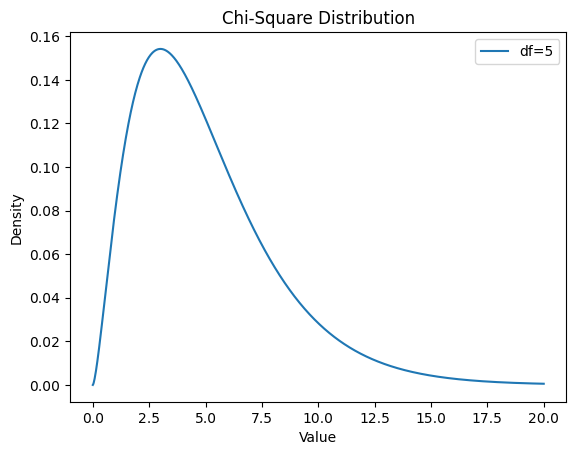

In [19]:
#Q>15 Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics



def visualize_chi_square(df):
    x = np.linspace(0, 20, 1000)
    y = stats.chi2.pdf(x, df)
    plt.plot(x, y, label=f"df={df}")
    plt.title("Chi-Square Distribution")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Example usage
visualize_chi_square(5)

In [20]:
# Q>16 Implement an F-test using Python to compare the variances of two random samplesD

def f_test(sample1, sample2):
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)
    f_stat = var1 / var2
    df1, df2 = len(sample1) - 1, len(sample2) - 1
    p_value = stats.f.cdf(f_stat, df1, df2)
    return f_stat, p_value

# Example usage
sample1 = np.random.normal(100, 15, 30)
sample2 = np.random.normal(100, 20, 30)
f_stat, p_val = f_test(sample1, sample2)
print(f"F-statistic: {f_stat}, P-value: {p_val}")

F-statistic: 1.923814826038227, P-value: 0.9583260715554468


In [21]:
#Q>17 Write a Python program to perform an ANOVA test to compare means between multiple groups and
#interpret the resultsD

from scipy.stats import f_oneway

def anova_test(*groups):
    f_stat, p_value = f_oneway(*groups)
    return f_stat, p_value

# Example usage
group1 = np.random.normal(100, 15, 30)
group2 = np.random.normal(110, 15, 30)
group3 = np.random.normal(105, 15, 30)
f_stat, p_val = anova_test(group1, group2, group3)
print(f"F-statistic: {f_stat}, P-value: {p_val}")

F-statistic: 12.05544164758894, P-value: 2.3915275280890314e-05


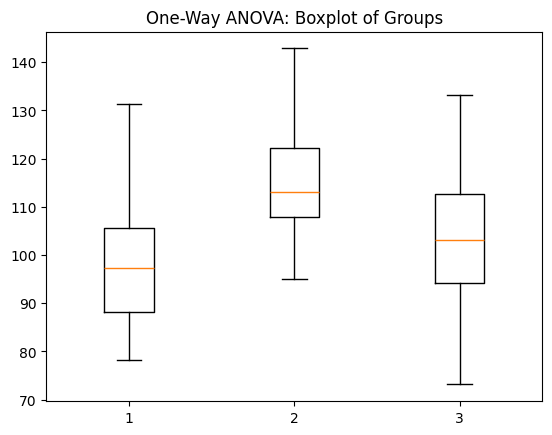

In [22]:

def anova_boxplot(*groups):
    plt.boxplot(groups)
    plt.title("One-Way ANOVA: Boxplot of Groups")
    plt.show()

anova_boxplot(group1, group2, group3)

In [23]:
#Q.19 Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVAD

from scipy.stats import shapiro, levene

def check_anova_assumptions(*groups):
    normality = [shapiro(group)[1] > 0.05 for group in groups]
    equal_variance = levene(*groups)[1] > 0.05
    return normality, equal_variance

# Example usage
normality, equal_variance = check_anova_assumptions(group1, group2, group3)
print(f"Normality: {normality}, Equal Variance: {equal_variance}")

Normality: [np.True_, np.True_, np.True_], Equal Variance: True


In [25]:
#Q>20 Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the

import statsmodels.api as sm
from statsmodels.formula.api import ols

def two_way_anova(df, dependent, factor1, factor2):
    model = ols(f'{dependent} ~ {factor1} + {factor2} + {factor1}:{factor2}', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    return anova_table
    

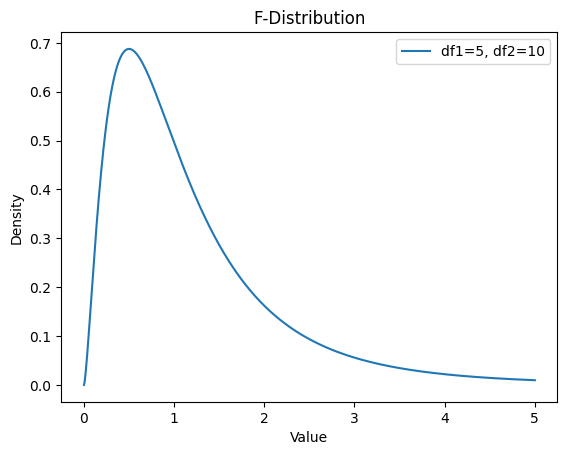

In [26]:
#Q.21 Write a Python program to visualize the F-distribution and discuss its use in hypothesis testingD

def visualize_f_distribution(df1, df2):
    x = np.linspace(0, 5, 1000)
    y = stats.f.pdf(x, df1, df2)
    plt.plot(x, y, label=f"df1={df1}, df2={df2}")
    plt.title("F-Distribution")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

visualize_f_distribution(5, 10)

In [27]:
#Q.22 Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group meansD

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Generate sample data for three groups
np.random.seed(42)
group1 = np.random.normal(100, 10, 30)  # Mean=100, StdDev=10, n=30
group2 = np.random.normal(105, 10, 30)  # Mean=105, StdDev=10, n=30
group3 = np.random.normal(110, 10, 30)  # Mean=110, StdDev=10, n=30

# Perform one-way ANOVA test
f_stat, p_value = f_oneway(group1, group2, group3)

# Print the results
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("The group means are significantly different (reject the null hypothesis).")
else:
    print("The group means are not significantly different (fail to reject the null hypothesis).")

F-statistic: 12.21
P-value: 0.0000
The group means are significantly different (reject the null hypothesis).


In [28]:
#Q.23 Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the meansD
import numpy as np
from scipy.stats import ttest_1samp

# Simulate random data
np.random.seed(42)
data = np.random.normal(100, 15, 50)  # Mean=100, StdDev=15, n=50

# Perform hypothesis testing (One-sample T-test)
population_mean = 105
t_stat, p_value = ttest_1samp(data, population_mean)

# Output results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: -4.23
P-value: 0.0001
Reject the null hypothesis: The sample mean is significantly different from the population mean.


In [29]:
#Q.24 Perform a hypothesis test for population variance using a Chi-square distribution and interpret the resultsD

from scipy.stats import chi2

# Simulate data
data = np.random.normal(100, 15, 50)  # Mean=100, StdDev=15, n=50
sample_variance = np.var(data, ddof=1)
population_variance = 225  # Population variance (15^2)

# Perform Chi-Square test
n = len(data)
chi2_stat = (n - 1) * sample_variance / population_variance
p_value = 2 * min(chi2.cdf(chi2_stat, df=n-1), 1 - chi2.cdf(chi2_stat, df=n-1))

# Output results
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: The sample variance is significantly different from the population variance.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")
    

Chi-Square Statistic: 37.46
P-value: 0.2287
Fail to reject the null hypothesis: No significant difference.


In [30]:
#Q. 25 Write a Python script to perform a Z-test for comparing proportions between two datasets or groupsD

from statsmodels.stats.proportion import proportions_ztest

# Simulate data
success_a, size_a = 50, 100  # 50 successes out of 100 trials in group A
success_b, size_b = 30, 80   # 30 successes out of 80 trials in group B

# Perform Z-test for proportions
z_stat, p_value = proportions_ztest([success_a, success_b], [size_a, size_b])

# Output results
print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: The proportions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Z-statistic: 1.68
P-value: 0.0935
Fail to reject the null hypothesis: No significant difference.


F-statistic: 0.73
P-value: 0.2661
Fail to reject the null hypothesis: No significant difference.


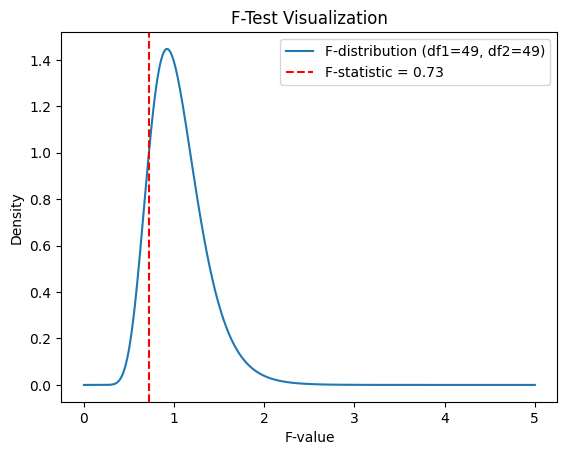

In [31]:
#Q.26 import matplotlib.pyplot as plt

# Simulate data
data1 = np.random.normal(100, 15, 50)
data2 = np.random.normal(100, 20, 50)

# Perform F-test
var1 = np.var(data1, ddof=1)
var2 = np.var(data2, ddof=1)
f_stat = var1 / var2
df1, df2 = len(data1) - 1, len(data2) - 1
p_value = 2 * min(stats.f.cdf(f_stat, df1, df2), 1 - stats.f.cdf(f_stat, df1, df2))

# Output results
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: The variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

# Visualization
x = np.linspace(0, 5, 1000)
y = stats.f.pdf(x, df1, df2)
plt.plot(x, y, label=f"F-distribution (df1={df1}, df2={df2})")
plt.axvline(f_stat, color="red", linestyle="--", label=f"F-statistic = {f_stat:.2f}")
plt.title("F-Test Visualization")
plt.xlabel("F-value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [32]:
#Q.27  Implement an F-test for comparing the variances of two datasets, then interpret and visualize the resultsD

 # Simulate observed data
observed = np.array([18, 22, 20])
expected = np.array([20, 20, 20])  # Expected frequencies

# Perform Chi-Square goodness-of-fit test
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Output results
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: The observed frequencies are significantly different from expected.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Chi-Square Statistic: 0.40
P-value: 0.8187
Fail to reject the null hypothesis: No significant difference.
